In [1]:
# import library
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as op

In [2]:
# load data
X = np.genfromtxt('X.txt').reshape((-1, 1))
y = np.genfromtxt('y.txt')
Xval = np.genfromtxt('Xval.txt').reshape((-1, 1))
yval = np.genfromtxt('yval.txt')
Xtest = np.genfromtxt('Xtest.txt').reshape((-1, 1))
ytest = np.genfromtxt('ytest.txt')

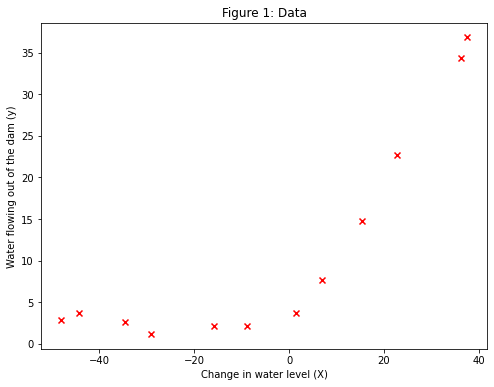

In [3]:
# plot data
def plotData(X, y):
    fig, ax = plt.subplots(figsize = (8,6))
    ax.scatter(X, y, marker = 'x', color = 'red')
    ax.set_title('Figure 1: Data')
    ax.set_xlabel('Change in water level (X)')
    ax.set_ylabel('Water flowing out of the dam (y)')
    return fig, ax
fig, ax = plotData(X, y)

In [4]:
def costFunction(theta, X, y, lam, m):
    h = X.dot(theta)
    return np.sum((h - y) ** 2) / (2 * m) + lam * np.sum(theta[1:] ** 2) / (2 * m)
def gradient(theta, X, y, lam, m):
    h = X.dot(theta)
    grad = X.T.dot(h - y) / m
    grad[1:] = grad[1:] + lam * theta[1:] / m
    return grad

In [5]:
X = np.concatenate((np.ones((len(X), 1)), X), axis = 1)
m, n = X.shape
lam = 1
initila_theta = np.zeros(n)
result = op.minimize(fun = costFunction, x0 = initila_theta, args = (X, y, lam, m), method = 'TNC', jac = gradient)
print(result)
theta = result.x

     fun: 22.379541822940265
     jac: array([-2.88431323e-09, -4.17643937e-08])
 message: 'Local minimum reached (|pg| ~= 0)'
    nfev: 9
     nit: 4
  status: 0
 success: True
       x: array([13.08771416,  0.367742  ])


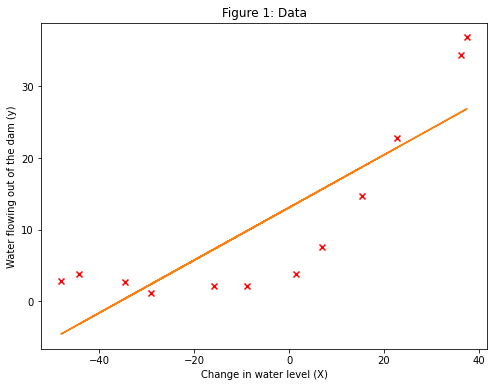

In [6]:
ax.plot(X, theta[0] + theta[1] * X)
fig

In [7]:
def trainLinearReg(X, y, lam):
    m, n = X.shape
    initial_theta = np.zeros(n)
    return op.minimize(fun = costFunction, x0 = initial_theta, args = (X, y, lam, m), method = 'TNC', jac = gradient).x
    
def learningCurve(X, y, Xval, yval, lam):
    m = len(X)
    error_train = np.zeros(m)
    error_val   = np.zeros(m)
    for i in range(1, m + 1):  
        X_train = X[:i, :]
        y_train = y[:i]
        theta   = trainLinearReg(X_train, y_train, lam)
        error_train[i - 1] = costFunction(theta, X_train, y_train, lam, m)
        error_val[i - 1]   = costFunction(theta, Xval, yval, lam, m)
    return error_train, error_val

In [8]:
Xval = np.concatenate((np.ones((len(Xval), 1)), Xval), axis = 1)
error_train, error_val = learningCurve(X, y, Xval, yval, 0)

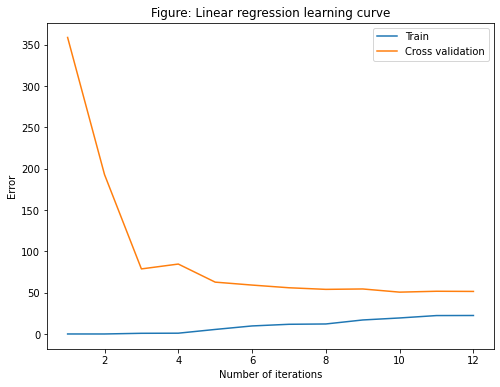

In [9]:
# under fit with model linear regression
it = np.arange(1, len(X) + 1)
plt.figure(figsize = (8,6))
plt.plot(it, error_train)
plt.plot(it, error_val)
plt.title('Figure: Linear regression learning curve')
plt.xlabel('Number of iterations')
plt.ylabel('Error')
plt.legend(['Train', 'Cross validation'])
plt.show()

In [10]:
# polynomial regression
def polyFeature(X, p):
    col = X
    for i in range(2, p + 1):
        X = np.concatenate((X, col ** i), axis = 1)
    return X
def featureNormalize(X):
    mu = X.mean(axis = 0)
    sigma = X.std(axis = 0)
    X = (X - mu) / sigma
    X = np.concatenate((np.ones((len(X), 1)), X), axis = 1)
    return X

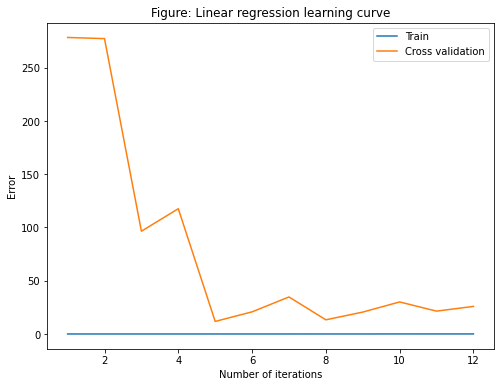

In [12]:
# over fit with lambda = 0
p = 8
X_poly = polyFeature(X[:, 1].reshape((-1, 1)), p)
X_poly = featureNormalize(X_poly)
X_val_poly = polyFeature(Xval[:, 1].reshape((-1, 1)), p)
X_val_poly = featureNormalize(X_val_poly)

error_train, error_val = learningCurve(X_poly, y, X_val_poly, yval, 0)
it = np.arange(1, len(X_poly) + 1)
plt.figure(figsize = (8,6))
plt.plot(it, error_train)
plt.plot(it, error_val)
plt.title('Figure: Overfit with poly regression (lambda = 0)')
plt.xlabel('Number of iterations')
plt.ylabel('Error')
plt.legend(['Train', 'Cross validation'])
plt.show()

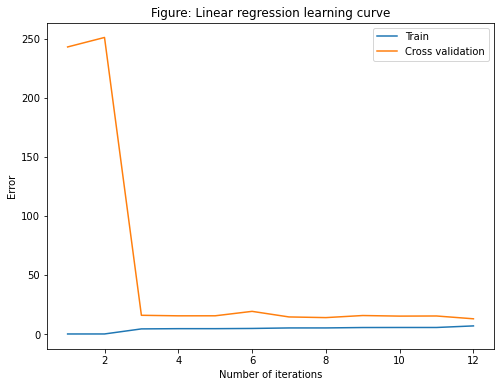

In [13]:
# nice model with lambda = 1
error_train, error_val = learningCurve(X_poly, y, X_val_poly, yval, 1)
it = np.arange(1, len(X_poly) + 1)
plt.figure(figsize = (8,6))
plt.plot(it, error_train)
plt.plot(it, error_val)
plt.title('Figure: Fit model (lambda = 1)')
plt.xlabel('Number of iterations')
plt.ylabel('Error')
plt.legend(['Train', 'Cross validation'])
plt.show()

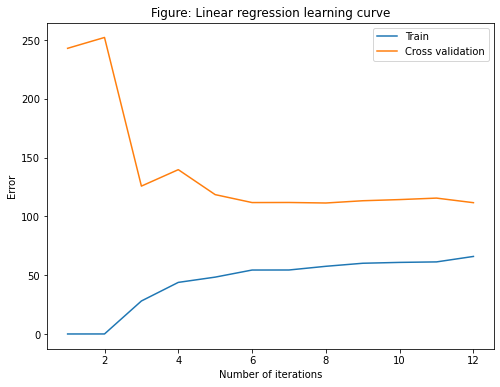

In [14]:
# under fit with lambda = 100
error_train, error_val = learningCurve(X_poly, y, X_val_poly, yval, 100)
it = np.arange(1, len(X_poly) + 1)
plt.figure(figsize = (8,6))
plt.plot(it, error_train)
plt.plot(it, error_val)
plt.title('Figure: Underfit model (lambda = 100)')
plt.xlabel('Number of iterations')
plt.ylabel('Error')
plt.legend(['Train', 'Cross validation'])
plt.show()